In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Cleansing**

In [2]:
# panggil stopword id
list_stopwords = stopwords_scratch.words('indonesian')
# panggil stopword en
list_stopwords_en = stopwords_scratch.words('english')
# gabungkan id & en
list_stopwords.extend(list_stopwords_en)
# tambah daftar stopword jika perlu
list_stopwords.extend(['ya', 'yg', 'ga', 'yuk', 'dah', 'ngga', 'engga', 'ygy'])
stopwords = list_stopwords

In [3]:
import re

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    # Menghapus RT
    string = re.sub(r'rt', '', string)
    return string

In [4]:
stopwords[:3]

['ada', 'adalah', 'adanya']

# **Upload Data**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
document = pd.read_csv('drive/My Drive/Kuliah Semester 5/Aplikasi Web/Praktikum 6/data_tweet_prabowo_clean.csv', sep=',')
document = document.rename(columns={'full_text': 'Tweet'})

In [7]:
document['Tweet'] = document.Tweet.apply(cleansing)
document.head()

,Unnamed: 0,conversation_id_str,created_at,favorite_count,Tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,predicted_sentiment
0,0,1842893064366661833,Sun Oct 06 11:42:00 +0000 2024,17,keterangan 1 mba yenny raut wajahnya memancark...,1842893064366661833,https://pbs.twimg.com/media/GZNFWNKakAEZ1Oh.jpg,NaN,in,"Grindelwald, Switzerland",2,6,3,https://x.com/PenculikBangsat/status/184289306...,164370154,PenculikBangsat,positive
1,1,1748028724703068217,Thu Jan 18 17:04:59 +0000 2024,23540,terima kasih pak prabowo pake pose jari itu u...,1748028724703068217,https://pbs.twimg.com/amplify_video_thumb/1748...,NaN,in,NaN,1829,959,5405,https://x.com/cinnamongirlc/status/17480287247...,58184629,cinnamongirlc,positive
2,2,1844529529307660750,Fri Oct 11 00:04:44 +0000 2024,3171,penghinaan tidak bisa ditoleransi apalagi meng...,1844529529307660750,https://pbs.twimg.com/ext_tw_video_thumb/18445...,NaN,in,NaN,34,419,1134,https://x.com/DokterTifa/status/18445295293076...,1502822366946402304,DokterTifa,negative
3,3,1843502891933536399,Tue Oct 08 11:59:26 +0000 2024,12,tempodotco apa dia takut ada yg akan memperma...,1843622227088179533,https://pbs.twimg.com/media/GZXcnz6asAEiEFT.jpg,tempodotco,in,"Jakarta Utara, DKI Jakarta",0,1,5,https://x.com/Tino_priok/status/18436222270881...,935721833864802306,Tino_priok,negative
4,4,1843781150390792403,Wed Oct 09 03:03:21 +0000 2024,59,dedynurpalakka ingat yg dihina itu bukan cuma...,1843849703659843913,https://pbs.twimg.com/media/GZarNh2a8AAYBId.jpg,DedynurPalakka,in,"Jakarta Utara, DKI Jakarta",0,10,13,https://x.com/Tino_priok/status/18438497036598...,935721833864802306,Tino_priok,positive


In [8]:
document = document.Tweet.to_list()
document[:10]

['keterangan 1 mba yenny raut wajahnya memancarkan keceriaan 2 mba puanmaharani ri senyuman yg terpancar kebahagiaan 3 mas didit prabowo senyuman kecil yg memiliki a i 4 gibran tweet gw bingung baca raut wajah nih orang bila gw bilang senyum bahagia ga juga  t co 2tfr3my6pm',
 ' terima kasih pak prabowo pake pose jari itu uang negara untuk bantuan ke palestina jangan dipersonalisasi seakan akan itu bantuan pribadi apalagi pake unsur unsur kampanye bener bener a is tolol  t co u7ywvsl9k7',
 'penghinaan tidak bisa ditoleransi apalagi menghina seorang pemimpin saya setuju dengan pak prabowo penghinaan termasuk perbuatan tercela tidak ada satupun pejabat yang dibolehkan melakukan perbuatan tercela apalagi menghina pemimpin negara apalagi menghina anak  t co uzyzrbnfoa',
 ' tempodotco apa dia takut ada yg akan mempermalukan nya karna ulah anaknya fufufafa klau benar gibran akan jadi gibran rakabuming neraka untuk mulyono keluarga se a para penjilatnya ingat yg diserang sama fufufafa bukan h

# **Feature Extraction**

In [9]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(document[:100])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


# **Training**

In [10]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [11]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# get_feature_names is deprecated in scikit-learn versions >= 0.2
# and replaced by get_feature_names_out
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print()

Cluster 0:
 co
 prabowo
 kabinet
 menteri
 presiden
 jokowi
 susunan
 indonesia
 pkb
 istana

Cluster 1:
 gibran
 prabowo
 fufufafa
 co
 anak
 jokowi
 menghina
 keluarga
 presiden
 amp



# **Evaluation**

In [12]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labels=model.predict(X))

# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
# Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

0.004629018133761396

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduce the feature to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

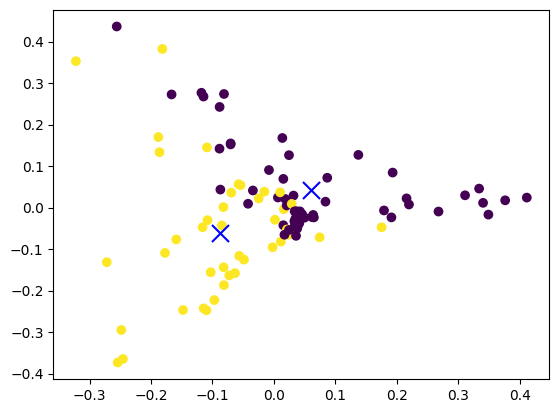

In [14]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:,0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')